In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [13]:
def dot_rotate(angle, x, y, xc=0, yc=0):
    angle = math.radians(angle)
    mat = np.array([[math.cos(angle), -math.sin(angle)],
              [math.sin(angle), math.cos(angle)]])
    return mat @ [x-xc, y-yc] + [xc, yc]

dot_rotate(90, 1, 0)

array([6.123234e-17, 1.000000e+00])

30.0


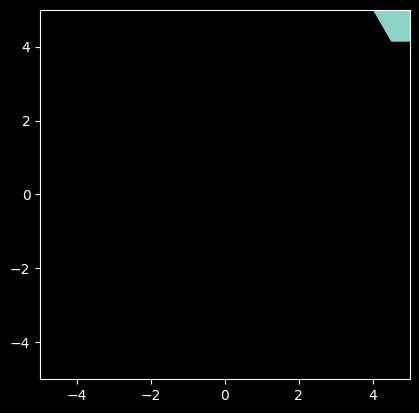

In [57]:
class Figure:
    def __init__(self, n=3, x=0, y=0, side=1):
        self.centre = [x, y]
        self.n = n
        self.radius = side/(2*math.sin(math.pi/n))
        self.points = [[x, y+self.radius]]
        angle = 360/n

        for _ in range(n-1):
            self.points.append(dot_rotate(angle, *self.points[-1], x, y))
        angle = (180-180*(n-2)/n)/2
        print(angle)
        if n % 2 == 0:
            self.rotate(angle)

    def draw(self, ax):
        ax.add_patch(Polygon(self.points))
    

    def rotate(self, angle, center=None):
        if center:
            x, y = center
        else:
            x, y = self.centre
    
        for n, dot in enumerate(self.points):
            self.points[n] = dot_rotate(angle, *dot, x, y)

f, a = plt.subplots()
a.set_xlim([-5, 5])
a.set_ylim([-5, 5])
a.set_aspect(1)
fi = Figure(6, 5,5)
fi.draw(a)